<a href="https://colab.research.google.com/github/dkenessey/Campus_Inclusion/blob/main/Data_Analysis_Challenge_Campus_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

The National Campus Inclusion Initiative (NCII) is a non-profit organization focused on promoting diversity and inclusion in higher education institutions across the United States. The NCII wants to identify the key factors that contribute to a higher inclusivity rating for campuses and understand the relationship between the size and type of community and the inclusivity rating. This analysis will help the NCII prioritize efforts and resources towards campuses that need the most improvement and identify best practices from high-rating campuses.

# Key Insights

1.   The country-wide average inclusion rating was 3.98. The states with the highest average inclusion rating included Vermont, Indiana, and Nebraska.
2.   Larger campuses tend to receive higher inclusion ratings, though this relationship is only moderate.
3.   Campuses located in more urban settings generally have higher inclusivity ratings.
4.   Overall, campuses situated in medium-sized communities with medium-sized student populations, located in the Northeast and Midwest regions, received the highest inclusivity ratings.
5.   To improve inclusivity ratings campuses with lower ratings should:
     - Implement Policies Promoting Inclusivity
     - Seek Funding for Inclusivity Initiatives
     - Hire and Promote Inclusive Leadership
     - Provide Training on Inclusive Practices
     - Create Community Engagement Programs
     - Incentivize Participation from Marginalized Communities
     - Develop Metrics for Inclusivity Tracking

# Required Libraries

numpy == 1.25.2 <br>
pandas == 2.0.3 <br>
matplotlib == 3.7.1 <br>
seaborn == 0.13.1 <br>
geopandas == 0.13.2 <br>
scipy == 1.11.4 <br>
sckit-posthocs == 0.9.0 <br>

# Importing Libraries

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from scipy import stats
from scipy.stats import spearmanr
from scipy.stats import kruskal
!pip install scikit-posthocs
import scikit_posthocs as sp

# Importing Dataset

In [7]:
df_inclusion = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-8-24-Data Analyst Challenge/pride_index_cleaned.csv")
df_inclusion.head()

,campus_name,rating,students,community_type,community_size,city,state,student_population_category
0,Worcester State University,4.5,4039,medium city,205319,Worcester,MA,Small
1,University Of Wisconsin,4.5,43193,medium city,272903,Madison,WI,Very Large
2,George Mason University,5.0,39150,small city,24835,Fairfax,VA,Very Large
3,University Of Houston,4.5,40000,large urban city,2303000,Houston,TX,Very Large
4,College Of Staten Island/Cuny,3.5,10185,large urban city,492925,Staten Island,NY,Medium


In [8]:
df = df_inclusion.copy()

# Exploring Dataset

In [ ]:
df.shape

(238, 7)

In [ ]:
df.nunique()

campus_name                    238
rating                           8
students                       182
community_type                   6
community_size                 217
city                           215
state                           42
student_population_category      5
dtype: int64

In [ ]:
df.isnull().sum()

campus_name                    0
rating                         0
students                       0
community_type                 0
community_size                 0
city                           0
state                          0
student_population_category    0
dtype: int64

# Inclusivity Distribution

What is the distribution of inclusivity ratings among campuses? Provide a detailed statistical summary and visualize the distribution of the ratings. What can you infer about the general level of inclusivity across campuses?

In [ ]:
rating_distribution = df.iloc[:, [0, 1, -2]] #Extracting Campus info and Rating
rating_distribution

,campus_name,rating,state
0,Worcester State University,4.5,MA
1,University Of Wisconsin,4.5,WI
2,George Mason University,5.0,VA
3,University Of Houston,4.5,TX
4,College Of Staten Island/Cuny,3.5,NY
...,...,...,...
233,Woodbury University,3.0,CA
234,University Of Texas Arlington,5.0,TX
235,University Of Arkansas At Little Rock,2.5,AR
236,Linfield University,3.0,OR


### Country-level Analysis

There are 238 campuses rated on inclusion within this dataset. The median country-wide campus inclusion rating is 4.00, which is relatively high, while the country-wide average rating is 3.98. The close proximity of the mean and median suggests that there are no extreme outliers significantly skewing the mean. The most commonly received campus inclusion rating was also 4.00. Out of all the campuses rated on inclusion, 25% of them received a rating of 3.5 or below, while 25% got a rating of 4.5 or above. The lowest rating received was 1.5, while the highest was 5.00. The histogram shows that most campus inclusion ratings fell between 3.00 and 5.00.

In [ ]:
#Country-level summary statistics on inclusion
rating_distribution['rating'].describe()

count    238.000000
mean       3.976891
std        0.814227
min        1.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: rating, dtype: float64

In [ ]:
#Calculating m.ode
rating_distribution['rating'].mode()

0    4.0
Name: rating, dtype: float64

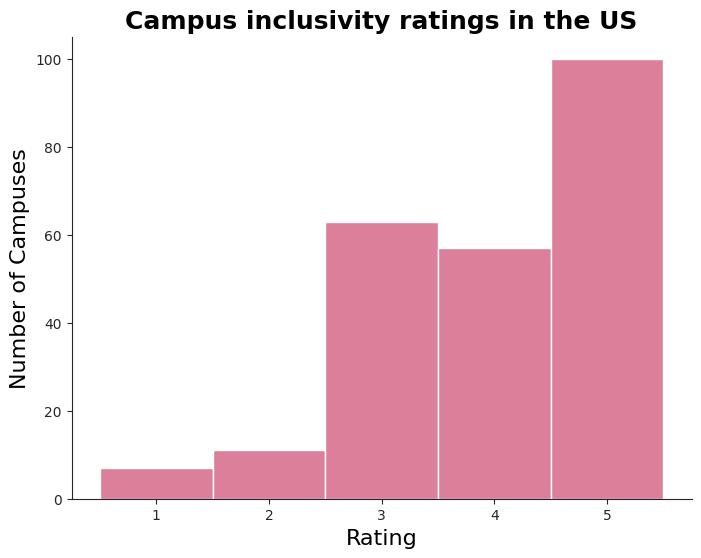

In [ ]:
#Visualizing inclusion rating distribution at the state level
sns.set_style("ticks")
plt.figure(figsize = (8, 6))
plt.hist(rating_distribution["rating"],
         bins = 5,
         color = "#DC7F9B")
plt.title("Campus inclusivity ratings in the US", fontsize = 18, fontweight = "bold", color='black')
plt.xlabel("Rating", fontsize = 16, color='black')
plt.ylabel("Number of Campuses", fontsize = 16, color='black')
sns.despine()

#Specifying X-axis labels
bins = 5
hist, bins_edges = np.histogram(rating_distribution["rating"], bins=bins)
bin_centers = 0.5 * (bins_edges[1:] + bins_edges[:-1])
plt.xticks(ticks=bin_centers, labels=np.arange(1, 6, 1))

plt.show()

### State-level Analysis

The average rating for most states falls between 3.50 and 4.50, suggesting a generally high perception of inclusivity. The standard deviations vary, indicating that some states have more consistent ratings while others show greater variability.

To determine whether any state received disproportionately low or high inclusion ratings, state-wide average ratings were calculated by taking the mean inclusion rating of all campuses found in each state. It is important to note that nine states had no rating information: Alaska, Delaware, Louisiana, Mississippi, Nevada, South Carolina, Iowa, Wyoming, and Hawaii.

The states with the highest average inclusion ratings were Vermont (5.00 average, one campus rated), Indiana (4.83 average, three campuses rated), and Nebraska (4.75 average, two campuses rated). Conversely, the states with the lowest average campus inclusion ratings were South Dakota (2.00 average, one campus rated), Arkansas (2.25 average, two campuses rated), and Idaho (2.50 average, one campus rated). States with the highest number of campuses rated included New York (22 campuses rated with a state average of 4.11), California (17 campuses rated with a state average of 3.50), and Pennsylvania (21 campuses rated with a state average of 3.86).

In [ ]:
rating_distribution.groupby('state')['rating'].describe().round(decimals=2) #State-level summary statistics on inclusion

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AL,1.0,4.50,NaN,4.5,4.50,4.50,4.50,4.5
AR,2.0,2.25,0.35,2.0,2.12,2.25,2.38,2.5
AZ,1.0,4.50,NaN,4.5,4.50,4.50,4.50,4.5
CA,17.0,3.50,0.83,1.5,3.00,3.50,4.00,5.0
CO,8.0,4.00,0.93,2.5,3.38,4.25,4.62,5.0
CT,3.0,4.33,0.58,4.0,4.00,4.00,4.50,5.0
DC,1.0,3.50,NaN,3.5,3.50,3.50,3.50,3.5
FL,3.0,3.83,0.76,3.0,3.50,4.00,4.25,4.5
GA,3.0,3.67,0.76,3.0,3.25,3.50,4.00,4.5


In [ ]:
#Calculating state-level mode
def get_mode(group):
    return group.mode().iloc[0] if not group.mode().empty else None

mode_ratings = rating_distribution.groupby('state')['rating'].apply(get_mode).reset_index()
mode_ratings

,state,rating
0,AL,4.5
1,AR,2.0
2,AZ,4.5
3,CA,3.5
4,CO,4.5
5,CT,4.0
6,DC,3.5
7,FL,3.0
8,GA,3.0
9,ID,2.5


In [ ]:
#Dictionary that can be used to map state names and abbreviations
state_abbr = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [ ]:
us_states = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/Data in Motion/7-8-24-Data Analyst Challenge/contiguous-us-with-states_1201.geojson') #Load GeoJSON file
us_states.head()

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."


In [ ]:
#Creating a column to use for merging geojson and df
us_states['state_abbr'] = us_states['state'].map(state_abbr)
us_states.head()

,state,adm1_code,population,geometry,state_abbr
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013...",MN
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7...",MT
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199...",ND
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0...",ID
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1...",WA


In [ ]:
#Merging geojson and df
merged_data = rating_distribution.merge(us_states, left_on='state', right_on='state_abbr', how='left')
merged_data.head()

,campus_name,rating,state_x,state_y,adm1_code,population,geometry,state_abbr
0,Worcester State University,4.5,MA,Massachusetts,USA-3513,6547629.0,"POLYGON ((-69.88480 41.92276, -69.96521 41.636...",MA
1,University Of Wisconsin,4.5,WI,Wisconsin,USA-3553,5686986.0,"POLYGON ((-86.48156 45.32318, -86.26460 45.226...",WI
2,George Mason University,5.0,VA,Virginia,USA-3552,8001024.0,"POLYGON ((-78.34562 39.40550, -77.83498 39.134...",VA
3,University Of Houston,4.5,TX,Texas,USA-3536,25145561.0,"POLYGON ((-93.57824 31.21613, -93.48984 31.079...",TX
4,College Of Staten Island/Cuny,3.5,NY,New York,USA-3559,19378102.0,"POLYGON ((-74.67903 41.35549, -74.84044 41.426...",NY


In [ ]:
#Extracting relevant columns for averaging
state_inclusivity = merged_data[['state_y', 'rating', 'geometry']]

#Generating state-wide inclusion rating averages
average_ratings = state_inclusivity.groupby(['state_y', 'geometry'])['rating'].mean().reset_index()
average_ratings.columns = ['state', 'geometry', 'average_rating']  #Renamint columns for clarity
average_ratings.head()

,state,geometry,average_rating
0,Alabama,"POLYGON ((-85.05442 31.10870, -85.00519 30.990...",4.50
1,Arizona,"POLYGON ((-109.04523 36.99991, -109.04367 31.3...",4.50
2,Arkansas,"POLYGON ((-89.66292 36.02307, -89.67351 35.940...",2.25
3,California,"POLYGON ((-114.35490 34.46467, -114.16597 34.2...",3.50
4,Colorado,"POLYGON ((-102.05017 40.00082, -102.04012 38.4...",4.00


In [ ]:
#Creating a function to add states with no inclusion rating
def add_state_info(state_name, average_ratings_df, us_states_df):
    state_data = us_states_df[us_states_df['state'] == state_name] #Filtering us_states_df for the specified state

    if state_data.empty:
        return average_ratings_df  #Return original df if state not found

    geometry = state_data.iloc[0]['geometry'] #Extract geometry

    #Create a new df for the new row
    new_row = pd.DataFrame({
        'state': [state_name],
        'geometry': [geometry],
        'average_rating': [0.0]
    })

    #Concatenate average_ratings_df with the new row df
    average_ratings_df = pd.concat([average_ratings_df, new_row], ignore_index=True)

    return average_ratings_df

# Add states without an average rating with corresponding geometry
average_ratings = add_state_info('Alaska', average_ratings, us_states)
average_ratings = add_state_info('Delaware', average_ratings, us_states)
average_ratings = add_state_info('Louisiana', average_ratings, us_states)
average_ratings = add_state_info('Nevada', average_ratings, us_states)
average_ratings = add_state_info('Mississippi', average_ratings, us_states)
average_ratings = add_state_info('South Carolina', average_ratings, us_states)
average_ratings = add_state_info('Iowa', average_ratings, us_states)
average_ratings = add_state_info('Wyoming', average_ratings, us_states)
average_ratings = add_state_info('Hawaii', average_ratings, us_states)

#Display the updated df
average_ratings.tail()

,state,geometry,average_rating
50,Nevada,"POLYGON ((-114.030528 36.994099, -114.023629 3...",0.0
51,Mississippi,"POLYGON ((-88.166964 34.999673, -88.095522 34....",0.0
52,South Carolina,"POLYGON ((-78.554114 33.861422, -79.06067 33.4...",0.0
53,Iowa,"POLYGON ((-90.156636 42.103735, -90.21007 41.8...",0.0
54,Wyoming,"POLYGON ((-111.067194 44.541597, -111.071406 4...",0.0


In [ ]:
#Calculating top 5 states with highest average inclusion rating
top_5_states = average_ratings.nlargest(5, 'average_rating')
top_5_states

,state,geometry,average_rating
36,Vermont,"POLYGON ((-71.503511 45.007796, -71.620455 44....",5.000000
10,Indiana,"POLYGON ((-84.806756 41.677741, -84.809934 40....",4.833333
20,Nebraska,"POLYGON ((-95.45254 40.215143, -95.322884 40.0...",4.750000
17,Minnesota,"POLYGON ((-89.599409 48.010274, -89.488885 48....",4.666667
0,Alabama,"POLYGON ((-85.054415 31.108696, -85.005193 30....",4.500000


In [ ]:
#Calculating the states with lowest average inclusion rating
filtered_df = average_ratings[average_ratings['average_rating'] > 0] #Filter out states without any rating

#Calculate states with lowest inclusion rating (excluding those with value 0)
lowest_inclusion_states = filtered_df.nsmallest(5, 'average_rating')
lowest_inclusion_states

,state,geometry,average_rating
32,South Dakota,"POLYGON ((-96.75427 42.633961, -97.028387 42.7...",2.000000
2,Arkansas,"POLYGON ((-89.662919 36.023073, -89.673513 35....",2.250000
8,Idaho,"POLYGON ((-111.049728 44.488163, -111.050245 4...",2.500000
31,Rhode Island,"POLYGON ((-71.1479 41.647587, -71.120382 41.49...",2.833333
3,California,"POLYGON ((-114.354901 34.464667, -114.165972 3...",3.500000


In [ ]:
gdf = gpd.GeoDataFrame(average_ratings, geometry='geometry') #Transform geometry column into geojson file

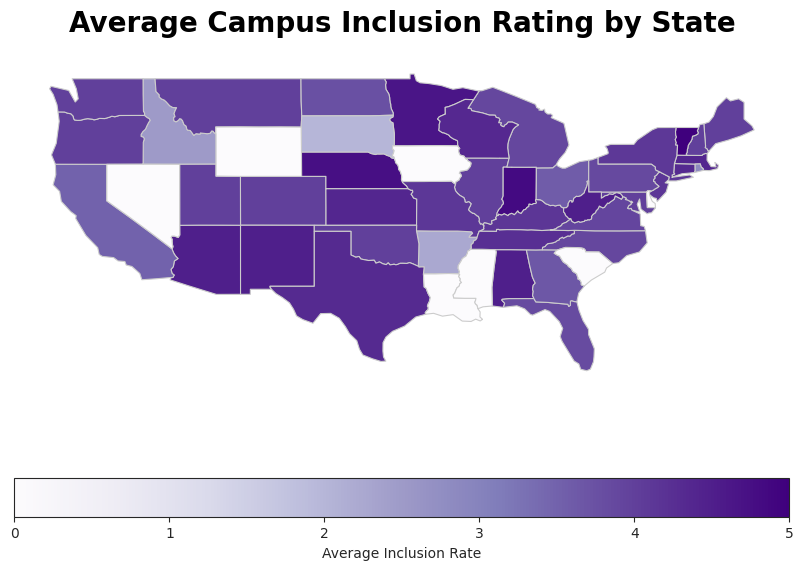

In [ ]:
#Choropleth showing average inclusion rates by state
fig, ax = plt.subplots(figsize=(10, 8))
plot = gdf.plot(column='average_rating', cmap='Purples', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True,
                legend_kwds={'label': "Average Inclusion Rate", 'orientation': "horizontal"})

ax.set_title('Average Campus Inclusion Rating by State', color='black', fontweight='bold', fontsize=20, pad=20)
ax.set_axis_off()
plt.show()

# Relationship between Student Population and Inclusion Rating

Is there a correlation between the number of students at a campus and its inclusivity rating? Do larger campuses tend to have higher or lower ratings?

In [13]:
inclusion_by_population_size = df.loc[:, ['students', 'rating', 'student_population_category']] #Extracting relevant columns
inclusion_by_population_size

,students,rating,student_population_category
0,4039,4.5,Small
1,43193,4.5,Very Large
2,39150,5.0,Very Large
3,40000,4.5,Very Large
4,10185,3.5,Medium
...,...,...,...
233,1132,3.0,Small
234,47000,5.0,Very Large
235,6712,2.5,Small
236,1750,3.0,Small


In [ ]:
#Testing if study population size varibale is normally distributed
stat, p_value = stats.shapiro(inclusion_by_population_size['students'])
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test: Statistic=0.8432955145835876, p-value=8.721726310189238e-15


In [ ]:
#Testing if rating varibale is normally distributed
stat, p_value = stats.shapiro(inclusion_by_population_size['rating'])
print(f'Shapiro-Wilk Test: Statistic={stat}, p-value={p_value}')

Shapiro-Wilk Test: Statistic=0.9168204665184021, p-value=2.8558910791787184e-10


Spearman Rank Correlation Coefficient: 0.4078461705449102
P-value: 5.923880464781366e-11


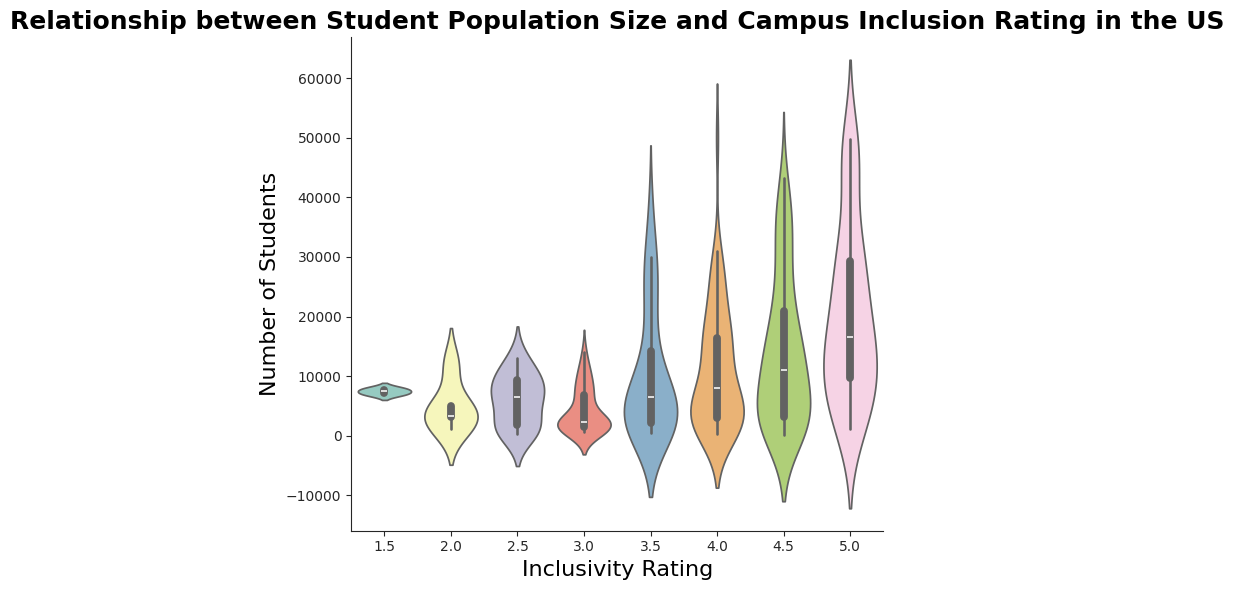

In [ ]:
#Correlation between student population size and inclusion rating
correlation, p_value = spearmanr(inclusion_by_population_size['students'], inclusion_by_population_size['rating'])
print(f"Spearman Rank Correlation Coefficient: {correlation}")
print(f"P-value: {p_value}")

sns.set_style("ticks")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
sns.violinplot(x = "rating",
            y = "students",
            data = inclusion_by_population_size,
            hue='rating',
            palette='Set3',
            legend=False)
plt.title("Relationship between Student Population Size and Campus Inclusion Rating in the US",
          fontsize = 18,
          weight = "bold",
          color = 'black')
plt.xlabel('Inclusivity Rating', color = 'black', fontsize = 16)
plt.ylabel('Number of Students', color = 'black', fontsize = 16)
sns.despine()
plt.tight_layout()
plt.show()

The relationship between student population size and inclusion rating is moderately strong and significant. Based on these results, generally, larger campuses tend to have higher inclusivity ratings.

In [14]:
#Decriptive statistics by student body size
inclusion_by_population_size.groupby('student_population_category')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
student_population_category,,,,,,,,
Large,36.0,4.361111,0.542627,3.5,4.0,4.5,5.0,5.0
Medium,53.0,4.216981,0.737130,2.0,4.0,4.5,5.0,5.0
Small,125.0,3.704000,0.825735,1.5,3.0,4.0,4.5,5.0
Very Large,15.0,4.666667,0.449868,3.5,4.5,5.0,5.0,5.0
Very Small,9.0,3.666667,0.829156,2.5,3.0,4.0,4.5,4.5


In [17]:
#Calculating the most frequent rating by student body size
inclusion_by_population_size.groupby('student_population_category')['rating'].apply(lambda x: x.mode()[0])

student_population_category
Large         5.0
Medium        4.0
Small         4.0
Very Large    5.0
Very Small    4.5
Name: rating, dtype: float64

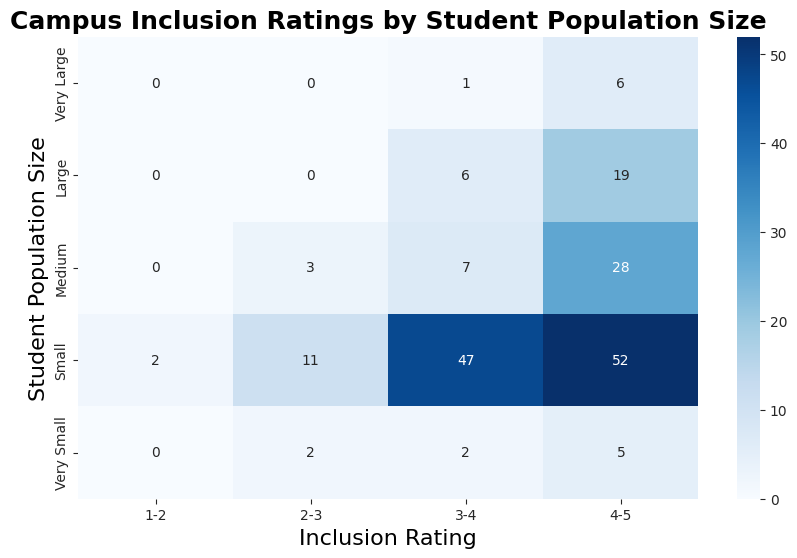

In [ ]:
#Visualizing when student population size is categorized
bins = [1, 2, 3, 4, 5]
labels = ['1-2', '2-3', '3-4', '4-5']
inclusion_by_population_size['rating_bin'] = pd.cut(inclusion_by_population_size['rating'], bins=bins, labels=labels, right=False)
ordered_population_categories = ['Very Large', 'Large', 'Medium', 'Small', 'Very Small']

pivot_table = pd.crosstab(inclusion_by_population_size['student_population_category'], inclusion_by_population_size['rating_bin'])
pivot_table = pivot_table.reindex(index=ordered_population_categories)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Campus Inclusion Ratings by Student Population Size',  fontsize = 18,weight = "bold", color = 'black')
plt.xlabel('Inclusion Rating', color = 'black', fontsize = 16)
plt.ylabel('Student Population Size', color = 'black', fontsize = 16)
plt.show()

Campuses with a very large student population have a mean rating of 4.67, the highest among all categories, with ratings ranging from 3.5 to 5.0. In this category, 25% of campuses received ratings of 4.5 or lower, while another 25% received ratings of 5.0. The most frequent rating is 5.0.

Campuses with a large student population have a mean inclusion rating of 4.36, indicating a high perception of inclusivity. The ratings range from 3.5 to 5.0, with 25% of campuses receiving ratings of 4.0 or lower and another 25% receiving ratings of 5.0. The most frequently received rating is 5.0.

Campuses with a medium student population have a mean rating of 4.22, showing a strong perception of inclusivity, although with slightly more variation compared to large campuses. Ratings range from 2.0 to 5.0. In this category, 25% of campuses received ratings of 4.0 or lower, while another 25% received ratings of 5.0. The most common rating was 4.0.

Campuses with a small student population have a mean rating of 3.70, which is lower than that of large and medium-sized campuses. Ratings range from 1.5 to 5.0, with 25% of campuses receiving ratings of 3.0 or lower and another 25% receiving ratings of 4.5 or higher. The most frequently received rating is 4.0.

Campuses with a very small student population have a mean rating of 3.67, which is slightly lower than small and medium-sized campuses. Ratings range from 2.5 to 4.5, with 25% of campuses receiving ratings of 3.0 or lower and another 25% receiving ratings of 4.5. The most frequent rating is 4.5.

Campus inclusion ratings between 4.00 and 5.00 were the most common across campuses, regardless of student body size. Ratings between 1.00 and 2.00 were the rarest, only seen in two campuses with a small (1,000-10,000 students) student body size. Notably, no campuses with a large (30,000-40,000 students) or very large (40,000-50,000 students) student body size received ratings below 3.00, suggesting a high perception of inclusivity among larger campuses. This finding is consistent with the results of the correlation analysis, which indicated a positive relationship between student body size and inclusivity ratings.

# Inclusion Rating by Community Type

How does the community type affect the inclusivity rating of a campus? Compare the inclusivity ratings across different community types (e.g., large urban city, medium city, very small town, rural community). Use appropriate statistical tests and visualizations to support your analysis.

In [9]:
inclusion_by_community = df.loc[:, ['students', 'rating', 'community_type']] #Extracting relevant columns
inclusion_by_community.head()

,students,rating,community_type
0,4039,4.5,medium city
1,43193,4.5,medium city
2,39150,5.0,small city
3,40000,4.5,large urban city
4,10185,3.5,large urban city


In [10]:
inclusion_by_community['community_type'].unique() #Checking number of unique community types

array(['medium city', 'small city', 'large urban city', 'small town',
       'very small town', 'rural community'], dtype=object)

In [11]:
#Decriptive statistics by community type
inclusion_by_community.groupby('community_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
community_type,,,,,,,,
large urban city,44.0,4.125000,0.815012,1.5,3.5,4.50,4.625,5.0
medium city,54.0,4.074074,0.779498,2.5,3.5,4.00,4.875,5.0
rural community,15.0,3.566667,0.820859,2.0,3.0,3.50,4.250,4.5
small city,76.0,4.006579,0.838624,1.5,3.5,4.00,4.500,5.0
small town,37.0,3.905405,0.743844,2.0,3.5,4.00,4.500,5.0
very small town,12.0,3.541667,0.838243,2.0,3.0,3.75,4.125,4.5


In [16]:
#Calculating the most frequent rating by community type
inclusion_by_community.groupby('community_type')['rating'].apply(lambda x: x.mode()[0])

community_type
large urban city    4.5
medium city         5.0
rural community     4.5
small city          4.0
small town          4.0
very small town     3.0
Name: rating, dtype: float64

In [ ]:
#Kruskal-Wallis test to evaluate relationship between community type and inclusion rating
kruskal_result = kruskal(
    inclusion_by_community[inclusion_by_community['community_type'] == 'large urban city']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'medium city']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'very small town']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'rural community']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'small city']['rating'],
    inclusion_by_community[inclusion_by_community['community_type'] == 'small town']['rating'])

kruskal_result

KruskalResult(statistic=10.162961422577185, pvalue=0.07074731109296013)

In [ ]:
#Posthoc test comparing community types
posthoc = sp.posthoc_dunn(inclusion_by_community, val_col='rating', group_col='community_type', p_adjust='holm')
posthoc

,large urban city,medium city,rural community,small city,small town,very small town
large urban city,1.000000,1.00000,0.285577,1.000000,1.0,0.369411
medium city,1.000000,1.00000,0.496780,1.000000,1.0,0.593530
rural community,0.285577,0.49678,1.000000,0.593530,1.0,1.000000
small city,1.000000,1.00000,0.593530,1.000000,1.0,0.674444
small town,1.000000,1.00000,1.000000,1.000000,1.0,1.000000
very small town,0.369411,0.59353,1.000000,0.674444,1.0,1.000000


In [ ]:
inclusion_by_community.groupby('community_type')['rating'].count()

community_type
large urban city    44
medium city         54
rural community     15
small city          76
small town          37
very small town     12
Name: rating, dtype: int64

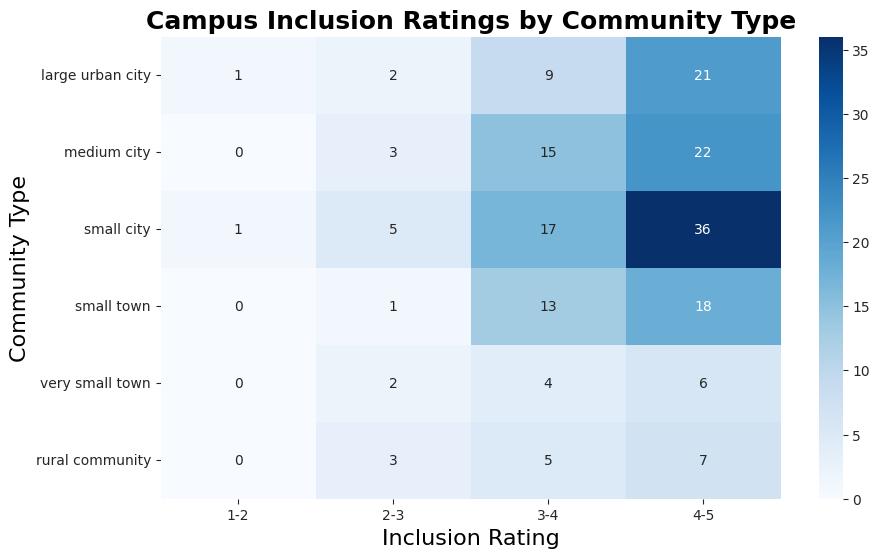

In [ ]:
#Visualizing when student population size is categorized
bins = [1, 2, 3, 4, 5]
labels = ['1-2', '2-3', '3-4', '4-5']
inclusion_by_community['rating_bin'] = pd.cut(inclusion_by_community['rating'], bins=bins, labels=labels, right=False)
ordered_community_categories = ['large urban city', 'medium city', 'small city', 'small town', 'very small town', 'rural community']

pivot_table2 = pd.crosstab(inclusion_by_community['community_type'], inclusion_by_community['rating_bin'])
pivot_table2 = pivot_table2.reindex(index=ordered_community_categories)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table2, annot=True, cmap='Blues')
plt.title('Campus Inclusion Ratings by Community Type',  fontsize = 18,weight = "bold", color = 'black')
plt.xlabel('Inclusion Rating', color = 'black', fontsize = 16)
plt.ylabel('Community Type', color = 'black', fontsize = 16)
plt.show()

Campuses in large urban cities have a mean inclusion rating of 4.13, suggesting that large urban cities generally have high inclusivity perceptions. The ratings range from a minimum of 1.5 to a maximum of 5.0. Out of the campuses located in large urban cities, 25% received an inclusion rating or 3.5 or lower, while 25% received a rating of 4.63 or higher. The most frequently received rating was 4.5 for campuses located in large urban cities.

Campuses in medium cities have a mean inclusion rating of 4.07, showing a generally high perception of inclusivity. Ratings range from 2.5 to 5.0. Out of the campuses located in medium cities, 25% received an inclusion rating or 3.5 or lower, while 25% received a rating of 4.88 or higher. The most common rating was 5.0 for campuses located in medium cities.

Campuses in small cities have a mean inclusion rating of 4.01, indicating generally high inclusivity ratings similar to larger urban areas. Ratings range from 1.5 to 5.0. Out of the campuses located in small cities, 25% received an inclusion rating or 3.5 or lower, while 25% received a rating of 4.50 or higher. The most frequently received rating was 4.0 for campuses located in small cities.

Campuses in small towns have a mean rating of 3.91, slightly lower on average compared to urban and small city areas but still positive. Ratings range from 2.0 to 5.0. Out of the campuses located in small towns, 25% received an inclusion rating or 3.5 or lower, while 25% received a rating of 4.00 or higher. The most common rating was 3.0 for campuses located in very small towns.

Campuses in very small towns have a mean rating of 3.54, indicating a somewhat lower perception of inclusivity compared to other community types. Ratings range from 2.0 to 4.5. Out of the campuses located in very small towns, 25% received an inclusion rating or 3.0 or lower, while 25% received a rating of 4.13 or higher. The most frequently received rating was 4.0 for campuses located in small towns.

Campuses in rural communities have a mean rating of 3.57,indicating a distribution that is somewhat lower than urban settings but still favorable. Ratings range from 2.0 to 4.5. Out of the campuses located in rural communities, 25% received an inclusion rating or 3.0 or lower, while 25% received a rating of 4.25 or higher. The most common rating was 4.5 for campuses located in rural areas.

The heatmap reinforces that campuses in more urban settings generally have higher inclusivity ratings; however, the sample size plays a significant role in the distribution of these ratings.


# Outlier Ratings

Which campuses are the outliers in terms of their inclusivity rating? Identify campuses that have significantly higher or lower inclusivity ratings compared to others in similar community types or with similar student populations. What characteristics or factors might explain these outliers?

### Characteristics of Campuses with Lowest Inclusivity Ratings

The trends suggest that campuses in small cities and rural communities, with small or medium student populations, located in the Northeastern and Southern United States, tend to have lower inclusion ratings.

In [20]:
#Select the required columns
selected_columns = ['campus_name', 'state', 'city', 'rating', 'community_type', 'student_population_category']

#Filter the df to include only rows with lowest ratings
lowest_rated_campuses = df[df['rating'] <= 2.5]

#Display results
lowest_rated_campuses[selected_columns]

,campus_name,state,city,rating,community_type,student_population_category
60,Camden County College,NJ,Blackwood,2.5,rural community,Small
96,Mohawk Valley Community College,NY,Utica,2.0,small city,Small
97,Bryant University,RI,Smithfield,2.0,small town,Small
99,Tidewater Community College,VA,Norfolk,1.5,large urban city,Small
100,Art Academy Of Cincinnati,OH,Cincinnati,2.5,medium city,Very Small
101,Joliet Junior College,IL,Joliet,2.5,small city,Small
104,Colorado College,CO,Colorado Springs,2.5,large urban city,Small
125,Catawba College,NC,Salisbury,2.0,rural community,Small
127,Rhode Island College,RI,Providence,2.5,medium city,Small
128,Big Sandy Community And Technical College,KY,Prestonsburg,2.5,rural community,Small


In [24]:
#Count of lowest rated campuses by state
lowest_rated_campuses['state'].value_counts()

state
RI    2
IL    2
CA    2
AR    2
NJ    1
NY    1
VA    1
OH    1
CO    1
NC    1
KY    1
SD    1
MI    1
ID    1
Name: count, dtype: int64

In [25]:
#Count of lowest rated campuses by community type
lowest_rated_campuses['community_type'].value_counts()

community_type
small city          6
rural community     3
large urban city    3
medium city         3
very small town     2
small town          1
Name: count, dtype: int64

In [26]:
#Count of lowest rated campuses by student population size
lowest_rated_campuses['student_population_category'].value_counts()

student_population_category
Small         13
Medium         3
Very Small     2
Name: count, dtype: int64

### Characteristics of Campuses with Highest Inclusivity Ratings

The trends suggest that campuses medium-sized communities, with medium-sized student populations, located in the Northeast and Midwest tend to receive the highest inclusivity ratings.

In [22]:
#Select the required columns
selected_columns = ['campus_name', 'state', 'city', 'rating', 'community_type', 'student_population_category']

#Filter the df to include only rows with highest ratings
highest_rated_campuses = df[df['rating'] == 5.0]

#Display results
highest_rated_campuses[selected_columns]

,campus_name,state,city,rating,community_type,student_population_category
2,George Mason University,VA,Fairfax,5.0,small city,Very Large
14,The Pennsylvania State University,PA,University Park,5.0,small town,Very Large
16,"Indiana University, Bloomington",IN,Bloomington,5.0,small city,Very Large
18,Macalester College,MN,Saint Paul,5.0,large urban city,Small
20,San Diego State University,CA,San Diego,5.0,large urban city,Large
26,Hofstra University,NY,Hempstead,5.0,medium city,Small
27,University Of Rochester,NY,Rochester,5.0,medium city,Medium
32,University Of Wisconsin - Eau Claire,WI,Eau Claire,5.0,small city,Medium
33,University Of Kentucky,KY,Lexington,5.0,medium city,Large
37,University At Albany - Suny,NY,Albany,5.0,medium city,Medium


In [27]:
#Count of highest rated campuses by state
highest_rated_campuses['state'].value_counts()

state
NY    7
IL    3
KY    3
PA    3
VA    2
MA    2
CO    2
NJ    2
MI    2
MD    2
TX    2
NC    2
WI    2
MN    2
IN    2
OH    1
CA    1
CT    1
OR    1
KS    1
MO    1
VT    1
WA    1
NE    1
Name: count, dtype: int64

In [28]:
#Count of highest rated campuses by community type
highest_rated_campuses['community_type'].value_counts()

community_type
small city          17
medium city         14
large urban city    11
small town           5
Name: count, dtype: int64

In [29]:
#Count of highest rated campuses by student population size
highest_rated_campuses['student_population_category'].value_counts()

student_population_category
Medium        15
Small         13
Large         11
Very Large     8
Name: count, dtype: int64

# Recommendations to Improve Inclusivity

### What factors are shaping campus inclusivity ratings?

 - **Legislation:** Highly rated campuses are often located in states with laws and policies supporting diversity and inclusion (e.g., non-discrimination policies, diversity in hiring practices).

 - **Funding:** The level of state funding for higher education can affect the resources available for inclusivity programs. Higher rated campuses are often located in states that have access to more funding to support higher education.

 - **Campus Leadership:** A campus with proactive leadership and a strong commitment to inclusivity can make significant progress to achieve higher inclusivity. Highly rated campuses often have a strong committment toward inclusive practices.

 - **Community Support:** The political climate can shape community attitudes towards inclusivity. Highly rated campuses are often located in states with strong community support for diversity, creating a more favorable environment for implementing inclusivity programs.

### How can campuses improve inclusivity ratings?

- **Implement Policies Promoting Inclusivity:** Develop and enforce comprehensive diversity and non-discrimination policies to create a welcoming environment for all campus members.
- **Seek Funding for Inclusivity Initiatives:** Obtain funding through grants, donations, and budget allocations specifically designated for supporting diversity and inclusivity programs.
- **Hire and Promote Inclusive Leadership:** Appoint and advance leaders with a proven track record in supporting and advancing inclusivity to drive campus-wide efforts.
- **Provide Training on Inclusive Practices:** Offer regular training sessions for students, faculty, and staff on best practices for fostering an inclusive campus environment.
- **Create Community Engagement Programs:** Develop and promote programs that build strong community connections and support inclusivity, involving local organizations and stakeholders.
- **Incentivize Participation from Marginalized Communities:** Establish scholarships, support programs, and student organizations to attract and retain members from historically marginalized groups.
- **Develop Metrics for Inclusivity Tracking:** Implement and regularly update metrics to assess and monitor progress in inclusivity, using data to guide improvements and celebrate successes.